<center><img src='https://drive.google.com/uc?export=view&id=1qJ8NqAZolTBQY7lN-deZ8xEsU3dlUiLz' width=200></center>


<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>AI Workshop - Digital Tech Year </center>
<hr style=" border:none; height:3px;">
</h1>




# Recognizing dogs and cats

The purpose of this laboratory is to build a first end to end reflex-based AI model to teach computers to [**understand images**](https://www.ted.com/talks/fei_fei_li_how_we_re_teaching_computers_to_understand_pictures).

In particular, the objective of this lab is to write an AI application able to recognize cats and dogs on images. Your application will take an image as input and will be able to say whether the image contains a dog or a cat. You will work with the data of the [**Dogs vs Cats**](https://www.kaggle.com/c/dogs-vs-cats) competition from Kaggle. This competition was launched in 2013 and the first place was obtained by [Pierre Sermanet](https://research.google.com/pubs/PierreSermanet.html), actually Research Scientist at Google Brain, by using the [Overfeat](http://cilvr.nyu.edu/doku.php?id=software:overfeat:start#overfeatobject_recognizer_feature_extractor) deep learning library he wrote during his PhD at New York University under the supervision of [Yann Le Cun](http://yann.lecun.com/), Chief AI Scientist for Facebook AI Research (FAIR). He obtained $1.09%$ of classification errors. Try to do your best to approach this score!!!

Two approaches will be used to adress this problem :
1. A traditional pattern recognition model in which hand-crafted features are extracted from images and used to represent them and to train classifiers.
2. A modern representation learning approach in which deep convolutional neural networks (CNNs) are used to learn the image representations.

 

##  Learning outcomes
+ Building an end to end supervised machine learning pipeline : input data (training set) preparation, training (model learning), validation sets, cross-validation, hyper-parameter tuning, evaluation on the testing dataset.
+ Getting familiar with deep learning for image classification : model building and training, transfer learning, fine-tuning.
+ Getting familiar with some well-known librairies:
    + Machine learning : Scikit-learn ([http://scikit-learn.org/stable/](http://scikit-learn.org/stable/))
    + Deep learning: Keras ([https://keras.io/](https://keras.io/))
    + Computer vision : Scikit-image ([http://scikit-image.org/](http://scikit-image.org/) or OpenCV ([http://opencv.org/](http://opencv.org/))
    
**The final objective of this laboratory is to be aware to the potential but also to the limitations of reflex-based AI approaches towards visual recognition tasks.**
    

## Part 0 : Requirements
A set of packages will be useful to handle the first part of this study case.

    pip install -r requirements.txt

In [5]:
!pip install -r requirements.txt

## Part 1 : A small tutorial on image classification

In this section, we will briefly introduce the image classification problem which consists in assigning to an input image one label from a fixed set of labels and which is one of the big challenge of computer vision and artificial intelligence. In our case, we will only consider two labels $\{dog, cat\}$. This small tutorial also aims at familiarizing you with machine learning and computer vision librairies that we will used in this course :
+ Scikit-Learn : [http://scikit-learn.org/stable/](http://scikit-learn.org/stable/)
+ OpenCV : [http://opencv.org/](http://opencv.org/) or Scikit-image ([http://scikit-image.org/](http://scikit-image.org/)).

![ImageCat](images/Diapositive1.jpg)

While the task of image classification is very easy for a human, we have to face with several challenge to build our automatic recognition algorithm among whom:

+ Viewpoint variation.
+ Scale variation.
+ Illumination conditions variation.
+ Deformation.
+ Occlusion.
+ Backgroud clutter.
+ Intraclass variation.

![ImageCatwithvariations](./images/Diapositive2.jpg)

![ImageCatwithocclusion](./images/Diapositive3.jpg)

Source : Images from the CS231n course of Stanford (Convolutional Neural Networks for Visual Recognition)












### A simple image classification pipeline

To built our image classification algorithm, we will follow the principle of a machine learning approach for image classification which consists in :
1. Collecting and preparing a dataset of images and their corresponding labels.
2. Using a machine learning algorithm to train a classifier.
3. Evaluate the classifier on new images.


![ImageClassificationpipeline](images/testphase.png)

#### Having a look on the available data

First, you have to  download the dataset that will be used to train and test our model. Before downloading the data, create a subdirectory in your working folder called data. Then download [DataDogsCatsChallenge.zip](https://filesender.renater.fr/?s=download&token=c9f0a37a-7371-4574-9fdd-d9251a816a52) into that directory and unzip it. This dataset contains 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for the Kaggle competition.

As we have seen in the lecture note, the standard practice in machine learning is to split the available data into at least two different subsets :
+ The **training set** : to learn the model.
+ The **testing set** : to evaluate the learned model.

You have also seen that it is also standard to add a third set to the split to build a **validation set** that will be used to fine-tune the parameters of the model.

I you have a look on the DogsCatsChallenge directory, you will see that the preparation of the data have been done and that the test and train sets are in separate subdirectories in which data for each category (cats and dogs) is also into subdirectories. Nevertheless, there is no validation set and one of your first task will be to build it.

The repo also contains a directory named **data** with two subdirectories names **sample** and **sampleDeep**. Training and validating the entire dataset is sometimes very long. Therefore, it is a good practice to run first your algorithm on a small sample of your training and validation data before to run it on the entire set of data.


##### Image representation

Your first task will be to build a representation of the data, i.e. a feature vector which values quantify the contents of the image. We will see latter that, using Deep Convolutional Neural Networks, we can learn an efficient representation directly using raw pixel intensities as inputs. Here, we will just represent the images by two alternative representations.
+ A first representation is built using the raw data by simply resizing an input image to a fixed size (here $32 \times 32$ pixels) and then by flattening the RBG pixel intensities into a single vectors of numbers.
+ A second representation is built from the color histogram that characterizes the color distribution of the image. For this representation a color conversion into the HSV color space could be useful.

**Complete the functions below to build such representations**

Some helping functions :
+ With Numpy:
    + [Array flattening](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html)
    
+ With OpenCV:

     + [Geometric transformations on images](http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html) 
     + [Colorspace conversion](http://docs.opencv.org/trunk/df/d9d/tutorial_py_colorspaces.html) 
     + [Histogram in OpenCV](http://docs.opencv.org/trunk/de/db2/tutorial_py_table_of_contents_histograms.html)
    
+ With Scikit-image :
    + [Loading an image from a file](https://scikit-image.org/docs/stable/user_guide/data_types.html)
    + [Image transformations](https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html)
    + [Colorspace conversion](https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html#color-manipulation)
     
    

Apply the following code.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import argparse
import cv2 as cv
import os

In [7]:
# TO DO : complete other import modules
def image_to_feature_vector(image, size=(32, 32)):
    # resize the image to a fixed size, then flatten the image into a list of raw pixel intensities
    # TO COMPLETE
    res = cv.resize(image,(size[0], size[1]))
    res = np.array(res).flatten()
    return res



def build_HSV_color_histogram_vector(image,bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using the supplied number of `bins` per channel and return it as a feature vector

    # TO COMPLETE
    img = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    hist = cv.calcHist([img], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = hist.flatten()
    return hist

Test your functions on a given image.

In [8]:
# TO COMPLETE
test_path = '.\\data\\DogCatChallenge\\sample\\train\\cats\\cat.394.jpg'
image = cv.imread(test_path)
print(image_to_feature_vector(image))
print(build_HSV_color_histogram_vector(image))


[182 202 207 ...  94  86 102]
[1.0000e+00 5.0000e+00 1.3000e+01 1.5600e+02 7.1200e+02 1.9260e+03
 1.2255e+04 9.0000e+02 2.0000e+00 3.1100e+02 2.3510e+03 5.8930e+03
 6.1710e+03 2.5960e+03 3.2900e+02 2.0000e+00 2.7000e+01 5.8670e+03
 9.8640e+03 1.6362e+04 6.2700e+03 1.0320e+03 1.3000e+01 0.0000e+00
 7.2000e+01 6.2620e+03 3.2560e+03 1.1730e+03 1.4300e+02 1.0000e+00
 0.0000e+00 0.0000e+00 1.2700e+02 1.1690e+03 7.9300e+02 3.4900e+02
 3.7000e+01 0.0000e+00 0.0000e+00 0.0000e+00 8.3000e+01 1.4300e+02
 5.7000e+01 2.5000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 4.7000e+01 6.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 5.3000e+01 3.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 2.0000e+00 7.0000e+00 6.2000e+01 2.9818e+04 8.3400e+03
 0.0000e+00 1.0000e+01 9.0000e+00 4.6000e+01 1.3200e+02 2.1900e+02
 4.4360e+03 0.0000e+00 2.0000e+00 1.8000e+01 1.1000e+01 7.0000e+00
 1.6000e+01 0.0000e+00 0.0000e+0

#### Dataset prepatation and feature extraction
The dataset has to be prepared for feature extraction :
+ Three lists will be initialized to store the raw pixel representation, the color distribution (histogram) representation and the class labels themselves.
+ Then, the lists will be completed by extracted the features from the dataset (don't forget to begin by testing your program on the sample dataset before to apply it on the whole dataset).

For this step, we can used the paths.py file [here](https://github.com/jrosebr1/imutils/blob/master/imutils/paths.py)




In [9]:
# import the necessary packages
import os

image_types = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")


def list_images(basePath, contains=None):
    # return the set of files that are valid
    return list_files(basePath, validExts=image_types, contains=contains)


def list_files(basePath, validExts=None, contains=None):
    # loop over the directory structure
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # loop over the filenames in the current directory
        for filename in filenames:
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            if contains is not None and filename.find(contains) == -1:
                continue

            # determine the file extension of the current file
            ext = filename[filename.rfind("."):].lower()

            # check to see if the file is an image and should be processed
            if validExts is None or ext.endswith(validExts):
                # construct the path to the image and yield it
                imagePath = os.path.join(rootDir, filename)
                yield imagePath

In [10]:
print("Describing images...")
imagePaths = list(list_images('.\\data\\DogCatChallenge\\sample'))
# initialize the raw pixel intensities matrix, the features matrix and labels list
rawImages_features = []
histogram_features = []
labels = []

# TO COMPLETE
for path in imagePaths:
    img = cv.imread(path)
    rawImages_features.append(image_to_feature_vector(img))
    histogram_features.append(build_HSV_color_histogram_vector(img))
    labels.append(path.split("\\")[-1].split(".")[0])

Describing images...


#### Dataset splitting into training and validation dataset

The last common step in machine learning will be to split the training dataset into training dataset and validation dataset. For this, you could use some functions from scikit-learn :

  + [Cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)
    
    
 In our case, the split of the dataset into training, validation and test set has been done but you can try to build another sample dataset using the fonctions of scikit-learn. In particular, if you are not familiar with **cross validation**, take the time to read carefully the previous documentation.

In [11]:
from sklearn.model_selection import train_test_split

# TO COMPLETE : building of another sample dataset
def split_dataset(X, y):
    return train_test_split(X, y, test_size=0.3, random_state=0)
X_train_rI, X_valid_rI, y_train_rI, y_valid_rI = split_dataset(rawImages_features, labels)
X_train_h, X_valid_h, y_train_h, y_valid_h = split_dataset(histogram_features, labels)

#### Classification using the K-Nearest Neighbor (k-NN) classifier


In order to build this simple image classification pipeline, you will use the k-Nearest Neighbor (k-NN) classifier which is a very simple machine learning/image classification approach, rarely used in practice but its simplicity will enable you to get quickly an idea of the image classification pipeline.

The principle of the [k-NN classifier](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) can be summarized by the following principle : “Tell me who your neighbors are, and I’ll tell you who you are”. Given an unknown image and a training dataset, the k-NN classifier will compare this image to every single image of the training dataset and will predict the label by finding the most common class among the k-closest examples.

Thus to apply the k-nearest Neighbor classification, we need to define a distance metric or a similarity function. For the sake of simplicity, here we will consider the euclidian distance but other distances can be used according to the targeted type of data.

$d(\mathbf{p},\mathbf{q})=\sqrt{\sum_{i=1}^{N}(q_i-p_i)^2}$

with $\mathbf{p}$ and $\mathbf{q}$ two data vectorial representations.

You can now train and predict a k-Nearest Neighbor classifier on your different splits. Once again, we suggest you to have a look on the scikit-learn documentation :
+ [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
+ [Example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)
+ [An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# training and evaluation of a k-NN classifer on the raw pixel representation

# TO COMPLETE
kNN_clf_rI = KNeighborsClassifier(n_neighbors=5)
kNN_clf_rI.fit(X_train_rI, y_train_rI)
y_pred_rI = kNN_clf_rI.predict(X_valid_rI)
print("Raw pixel representation accuracy:", accuracy_score(y_valid_rI, y_pred_rI))

# training and evaluation of  a k-NN classifer on the color histogram representation

# TO COMPLETE
kNN_clf_h = KNeighborsClassifier(n_neighbors=5)
kNN_clf_h.fit(X_train_h, y_train_h)
y_pred_h = kNN_clf_h.predict(X_valid_h)
print("Color histogram representation accuracy:", accuracy_score(y_valid_h, y_pred_h))


Raw pixel representation accuracy: 0.5
Color histogram representation accuracy: 0.75


c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

**Take the time to compare and to discuss with the others of your obtained score !**

#### Validation sets for Hyperparameter tuning

The k-nearest neighbor classifier requires a setting for k. What value have you chosen?  How ? Another parameter of this classifier is the choice of the distance functions we could have used. These choices are called **hyperparameters** and their setting is one of the main issue of the design of many Machine Learning algorithms.

To choose these hyperparameter values, the principle is to try out many different values and to see which work best. The main question is on which data ? On the test set ? On the training set ? In fact, the idea is to split your training set in two: a slightly smaller training set, and what we call a **validation set** as explained in the course.

The scikit-learn library has two methods that can perform hyperparameter search and optimization: **Grid search** and **Randomized Search**. Let's have a look on their documentations :
 + [Tuning the hyper-parameters of an estimator](http://scikit-learn.org/stable/modules/grid_search.html)
 
 
You will now apply these two methods to tune the hyperparameters of your k-NN classifier :
 1. First, define a dictionary of parameters which contains two keys :
     + `n_neighbors` the number of nearest neighbors $k$ in the k-NN algorithm that we will vary in the range $[1, 29]$ (if your sample dataset is sufficient)
     + `metric` the distance function/similarity metric for k-NN that can be either the Euclidean distance either the Manhattan/City block distance.
 2. Then, apply Grid Search and Randomized Search



In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import time

# TO COMPLETE

params = {"n_neighbors": np.arange(1, 10, 1),"metric": ["euclidean", "manhattan"]}

# tune the hyperparameters via a cross-validated grid search of the KNN classifier on raw features

print("Tuning hyperparameters via grid search on raw features")
# TO COMPLETE
start = time.time()
# TO COMPLETE

# evaluate the best grid searched model on the testing data 
grid_search_rI = GridSearchCV(kNN_clf_rI, params, scoring="accuracy")
grid_search_rI.fit(rawImages_features, labels) # cross validation is done automatically
print(grid_search_rI.best_estimator_)
# TO COMPLETE : print the time and the obtained best parameters
print("Time to obtain best parameters:", time.time()-start)
# tune the hyperparameters via a cross-validated randomized search of the KNN classifier on raw features

print("\nTuning hyperparameters via randomized search on raw features")
# TO COMPLETE
start = time.time()
# TO COMPLETE

# evaluate the best grid searched model on the testing data 
randomized_search_rI = RandomizedSearchCV(kNN_clf_rI, params, scoring="accuracy")
randomized_search_rI.fit(rawImages_features, labels)
print(randomized_search_rI.best_estimator_)
# TO COMPLETE : print the time and the obtained best parameters
print("Time to obtain best parameters:", time.time()-start)
# tune the hyperparameters via a cross-validated grid search of the KNN classifier on histo features

print("\nTuning hyperparameters via grid search on histo features")
# TO COMPLETE
start = time.time()
# TO COMPLETE

# evaluate the best grid searched model on the testing data 
grid_search_h = GridSearchCV(kNN_clf_h, params, scoring="accuracy")
grid_search_h.fit(histogram_features, labels)
print(grid_search_h.best_estimator_)
# TO COMPLETE : print the time and the obtained best parameters
print("Time to obtain best parameters:", time.time()-start)
# tune the hyperparameters via a cross-validated randomized search of the KNN classifier on raw features

print("\nTuning hyperparameters via randomized search on histo features")
# TO COMPLETE
start = time.time()
# TO COMPLETE

# evaluate the best grid searched model on the testing data 
randomized_search_h = RandomizedSearchCV(kNN_clf_h, params, scoring="accuracy")
randomized_search_h.fit(histogram_features, labels)
print(randomized_search_h.best_estimator_)
# TO COMPLETE : print the time and the obtained best parameters
print("Time to obtain best parameters:", time.time()-start)


Tuning hyperparameters via grid search on raw features


c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier(metric='euclidean', n_neighbors=1)
Time to obtain best parameters: 0.9186196327209473

Tuning hyperparameters via randomized search on raw features


c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier(metric='euclidean', n_neighbors=1)
Time to obtain best parameters: 0.30680227279663086

Tuning hyperparameters via grid search on histo features


c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier(metric='manhattan', n_neighbors=1)
Time to obtain best parameters: 0.5098590850830078

Tuning hyperparameters via randomized search on histo features
KNeighborsClassifier(metric='manhattan', n_neighbors=1)
Time to obtain best parameters: 0.23998761177062988


c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

#### Cross-test

Sometimes, the size of your training data (and therefore also the validation data) is small and, in this case, the technique used for hyperparameter tuning is **cross-test**. The main principle is to iterate over different validation sets and to average the performance across these. For example, in a 5-fold cross-validation, we split the training data into 5 equal folds, use 4 of them for training, and 1 for validation. We would then iterate over which fold is the validation fold, evaluate the performance, and finally average the performance across the different folds.

The scikit-learn library has also methods for this kind of cross validation :
+ [Cross-validation: evaluating estimator performance](http://scikit-learn.org/stable/modules/cross_validation.html#)

Here, you will just apply  **m-fold cross validation**. In particular, you have to write a 10-fold cross-validation run for the parameter k of our k-NN algorithm on the training dataset. You will just consider old value of $k$ on the range $[1,29]$


10-fold cross validation on the KNN classifier with raw features
Plotting the misclassification error versus k


c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

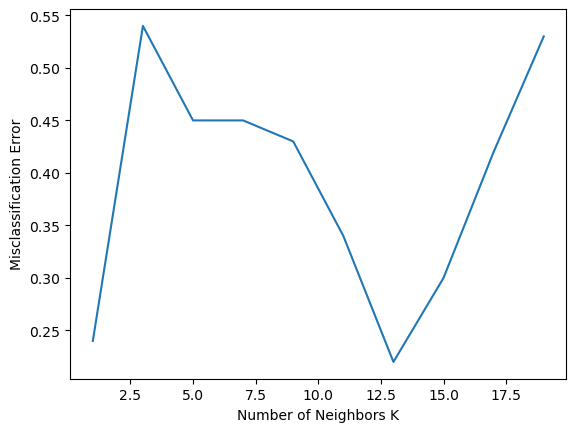

10-fold cross validation on the KNN classifier with hist features
Plotting the misclassification error versus k


c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\remib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

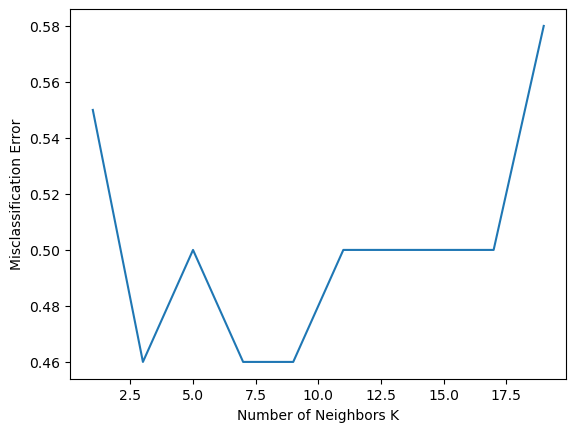

In [14]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# creating odd list of K for KNN
params = {"n_neighbors": np.arange(1, 20, 2)}

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation on the KNN classifier with raw features
print("10-fold cross validation on the KNN classifier with raw features")

# TO COMPLETE
for k in params["n_neighbors"]:
    score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k), rawImages_features, labels, cv=5))
    cv_scores.append(score)

print("Plotting the misclassification error versus k")
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = 1
# TO MODIFY
# print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(params["n_neighbors"], MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()



# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation on the KNN classifier with raw features
print("10-fold cross validation on the KNN classifier with hist features")

# TO COMPLETE
for k in params["n_neighbors"]:
    score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k), histogram_features, labels, cv=5))
    cv_scores.append(score)

print("Plotting the misclassification error versus k")
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = 1
# TO MODIFY
# print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(params["n_neighbors"], MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()







#### Summary of Part 1

    
+ <span style="background-color:lightgreen">Introduction of the problem of **Image Classification** </span>.
+ <span style="background-color:lightgreen">Introduction and building of a **first simple classifier: the k-NN classifier**.</span> As seen, this classifier is very simple to implement and understand and one of its advantages is that it takes no time to train since the training step consists in the storing and the indexing of the training data. It is a **transductive** approach. Nevertheless, the test time should be expensive since it consists in comparing the target data to every training data. **This behavior is contrary to what is expected** since, in practice, we are often more interested with the test time efficiency that to the training time one.
+ <span style="background-color:lightgreen">Introduction of the **supervised machine learning basic pipeline** : preparation of the data and splitting into **training, validation and test sets**, **training of a model** on a labelled training dataset, **hyperparameters tuning** on the validation set, **evaluation of the model accuracy** on the test set.</span>
+ <span style="background-color:lightgreen">Introduction to the **cross-validation** procedure.</span>


<span style="background-color:lightblue"> You have finished the part 1 ! Complete the dashboard on the global MsTeams team.</span>

## Part 2 : Using Hand-Crafted Features

In this part, you will also follow the traditional image recognition approach but you will try to improve your image representation by using better features than the raw representation and the color distribution. Indeed, raw pixel data is hard to use for machine learning and for comparing images in general due to the different challenges explained before.
As a consequence, the computer vision community had studied and proposed a wide range of robust and discriminative features such as HOG (Histogram of Oriented Gradients), SIFT (Scale-Invariant Feature Transform) or SURF (Speeded Up Robust Features) among others. These features are often refered as **hand-crafted features**. Have a look on the slides on a good tutorial on features for image classification at ECCV 2010 : [http://ufldl.stanford.edu/eccv10-tutorial/](http://ufldl.stanford.edu/eccv10-tutorial/).

In this part, we will use the discriminative bag of visual words (BoVW) approach to represent the content of the target images.  Bag of visual words (BoVW) is a popular technique for image classification inspired by models used in natural language processing and texture recognition. BoVW downplays word arrangement (spatial information in the image) and classifies based on an histogram of the frequency of visual words in image content. The set of visual words forms a visual vocabulary, which is built by clustering a large corpus of features. A first step will thus consist in building a visual vocabulary by clustering a large set of local features extracted from our training image corpus.

![Visualvocabularypipeline](images/bagoffeatures_visualwordsoverview.png)

Source : [mathwoks](https://fr.mathworks.com/help/vision/ug/image-classification-with-bag-of-visual-words.html?requestedDomain=www.mathworks.com)

Then, the typical BoVW pipeline for representing an image consists in :
1. extracting the local features from the image,
2. encoding the local features to the corresponding visual words
3. performing spatial pooling.

Then, all the images of your training set are described with the BoVW representation and on the same way than in the previous part you can train any off-shelf classifier to classify images. Here you will train a SVM.

![BovWrepresentation](images/yfA1C.png)

For this part we suggest to use the OpenCV and scikit-learn libraries.

Some documentation :
 + [Sift and OpenCV](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html)
 + A small tutorial on Bag of visual words in python [here](https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f)


### Visual Vocabulary Building

In [15]:
import numpy as np
import os
import random

# Here you have to extract SIFT features on all images of the training set and to make a k-means clustering to build the visual vocabulary.


# Get the path of the training set
# TO COMPLETE
path_training_set = ".\\data\\DogCatChallenge\\sampleDeep\\train"
path_testing_set = ".\\data\\DogCatChallenge\\sampleDeep\\test"

# Get all the path to the images and save them in a list
# image_paths and the corresponding label in image_classes
image_paths = []
image_classes = []
# TO COMPLETE

image_paths = list(list_images(path_training_set))
random.shuffle(image_paths)
for path in image_paths:
    image_classes.append(path.split("\\")[-1].split(".")[0])

# test
image_paths_test = []
image_classes_test = []

image_paths_test = list(list_images(path_testing_set))
random.shuffle(image_paths_test)
for path in image_paths_test:
    image_classes_test.append(path.split("\\")[-1].split(".")[0])

# Create feature extraction and keypoint detector objects using opencv 

# TO COMPLETE
sift = cv.SIFT_create()

# List where all the descriptors are stored
# TO COMPLETE
des_list = []
for path in image_paths:
    img = cv.imread(path)
    kp, des = sift.detectAndCompute(img, None)
    des_list.append([path, des])

des_list_test = []
for path in image_paths_test:
    img = cv.imread(path)
    kp, des = sift.detectAndCompute(img, None)
    des_list_test.append([path, des])
    
# Stack all the descriptors vertically in a numpy array

# descriptors = des_list[0][1]
# for image_path, descriptor in des_list[1:]:
#     descriptors = np.vstack((descriptors, descriptor))

nb_images_for_kmeans = 150
n = 0
for path, descriptor in des_list[:nb_images_for_kmeans]: # we don't take all the images
    n += len(descriptor)

descriptors = np.zeros((n, des_list[0][1].shape[1]))
k = 0
for path, descriptor in des_list[:nb_images_for_kmeans]:
    for v in descriptor:
        descriptors[k] = v
        k += 1

# Perform k-means clustering
k = 100
# TO COMPLETE 
from sklearn.cluster import KMeans
Kmeans_clf = KMeans(n_clusters=k)
Kmeans_clf.fit(descriptors)
visual_words = Kmeans_clf.cluster_centers_

At the end of this first step, you have your vocabulary of visual words. You will now use the vocabulary in order to build a representation of each image as a bag of visual words, i.e. each image will be described as an histogram of visual words.

### BoVW pipeline 
Here you have to write the BoVW pipeline and to apply it to each image of the training dataset. 

In [16]:
# TO COMPLETE
from tqdm import tqdm

img_histograms = []
for img_path, features in tqdm(des_list):
    histogram = np.zeros(len(visual_words))
    indices = Kmeans_clf.predict(np.float64(features))
    img_histograms.append(np.histogram(indices,bins=k)[0])

img_histograms_test = []
for img_path, features in tqdm(des_list_test):
    histogram = np.zeros(len(visual_words))
    indices = Kmeans_clf.predict(np.float64(features))
    img_histograms_test.append(np.histogram(indices,bins=k)[0])

100%|██████████| 800/800 [00:55<00:00, 14.36it/s]


### Classification using the BoVW representation and linear SVMs

Now, your objective is to train and test a dog and cat classifier using the BoVW representation and SVMs. The good practices of the Part 0 have to be used. 
Some references :

 + [http://scikit-learn.org/stable/modules/svm.html](http://scikit-learn.org/stable/modules/svm.html)
 + [http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)
 + [http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)

In [19]:
from sklearn import svm

SVM_clf = svm.SVC()
SVM_clf.fit(img_histograms, image_classes)
SVM_clf.score(img_histograms_test, image_classes_test)

0.7075

#### Summary of Part 2

    
+ <span style="background-color:lightgreen">Introduction of classical **hand crafted feature representation** used in computer vision </span>.
+ <span style="background-color:lightgreen"> Knowledge on OpenCV.</span> 
+ <span style="background-color:lightgreen"> Building of another **supervised machine learning basic pipeline** </span>
+ <span style="background-color:lightgreen"> A important family of classifiers **SVMs**</span>

<span style="background-color:lightblue"> You have finished the part 2 ! Complete the dashboard on the global MsTeams team.</span>

## Part 3 : Using Convolutional Neural Networks

In this part, you are going to use convolutional neural networks (CNNs) and deep learning in order to build your image classifier. You will use the [Keras framework](https://keras.io/) which is a high-level neural network API, written in Python and capable of running on top of [TensorFlow](https://www.tensorflow.org/), [CNTK](https://github.com/Microsoft/CNTK), or [Theano](http://www.deeplearning.net/software/theano/). It was developed with a focus on enabling fast experimentation and as a consequence it is a good choice for this course. Various other frameworks are available and can also be used. Another important deep learning framework is [pytorch](https://pytorch.org/).


### Keras with sample data from the Dogs and cats recognition challenge

In this part, you will have to use Keras in order to
 + Build and train a small network from scratch
 + Use the bottleneck features of a pre-trained network
 + Fine-tune the top layers of a pre-trained network

The work will be done on a **sample dataset** (sampleDeep) of the initial Kaggle challenge that contains a training set composed of 1000 images of cats and 1000 images of dogs and a validation set, used to evaluate our models, that contains 400 additional samples from each class.

At the end, you could apply this approach on the whole dataset but it will imply to have other computing ressources than just your own computer. 



#### Data preparation and loading

As for the previous classifiers, data preparation is also required when working with convolutional neural networks and deep learning models. You will use the [*ImageDataGenerator class*](https://keras.io/preprocessing/image/) that defines the configuration for image data preparation but also for data augmentation, a step often necessary for deep learning. In the code below, you will have to create and configure an `ImageDataGenerator` and to fit it on your data. In this example, we will use the sample dataset of the Dogs and Cats challenge. We consider that you have a training directory and a validation directory setup in this manner :

    train_dir/
        dog/
        cat/
    val_dir/
        dog/
        cat
 This is the case of the `sampleDeep` dataset.
 

In [14]:
# without augmentation, only rescaling

from keras.preprocessing.image import ImageDataGenerator

# definition of the number of samples propagated through the network at each step
batch_size = 16

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
validation_data_dir = 'data/DogCatChallenge/sampleDeep/test'

# create and configure an ImageDataGenerator for the training data with only rescaling to 0..1
train_datagen =  ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # the target directory
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size) 

# create and configure an ImageDataGenerator for the validation data with only rescaling to 0..1
test_datagen =  ImageDataGenerator(rescale=1./255)

valid_generator = test_datagen.flow_from_directory(
        validation_data_dir,  # the target directory
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size) 



Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


Only few training examples are available in the `sampleDeep` dataset. In order to make the most of these training examples, a current approach is to **augment** them via a number of random transformations, so that our model would never see twice the exact same picture. This augmentation step helps prevent overfitting and helps the model generalize better.


In [15]:
# with augmentation 

from keras.preprocessing.image import ImageDataGenerator

# definition of the number of samples propagated through the network at each step
batch_size = 16

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
validation_data_dir = 'data/DogCatChallenge/sampleDeep/test'

# Create and configure an ImageDataGenerator for the training data
# TO DO :  augmentation of the training data using rotation, horizontal and vertical shift, shearing tranformation, zooming 

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=180,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=45,
    zoom_range=0.2)

# TO DO : Create and configure an ImageDataGenerator for the validation data
# Only rescaling for validation data
test_datagen = ImageDataGenerator(rescale = 1./255)

# TO COMPLETE

# TO DO : generator that will read pictures found in the train dataset directory and that will indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # the target directory
        class_mode="binary",
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size)

# TO DO : Similar generator for validation data
valid_generator = test_datagen.flow_from_directory(
        validation_data_dir,  # the target directory
        class_mode="binary",
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size) 


Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## Build a model from scratch

Models can be build easily with the Keras API. Here we will use the Sequential model API :
+ [https://keras.io/getting-started/sequential-model-guide/](https://keras.io/getting-started/sequential-model-guide/)


Here, you will build a convolutional neural network which is ,by design, one of the best models available for most "perceptual" problems (such as image classification), even with very little data to learn from.

In the code below, you have to build a model composed of 3 convolution layers with a ReLU activation and followed by max-pooling layers.
In order to write the code, have a look on the [documentation on the different kinds of layers available in Keras](https://keras.io/layers/about-keras-layers/)




In [53]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()

# First convolutional layer
model.add(Conv2D(
    input_shape=(img_width, img_height, 3),
    filters=16,
    kernel_size=(3, 3),
    activation="relu"))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(
    padding="same",
    filters=16,
    kernel_size=(3, 3),
    activation="relu"))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(
    padding="same",
    filters=16,
    kernel_size=(3, 3),
    activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

# Adding of two fully-connected layers 

model.add(Dense(70, activation="relu"))
model.add(Dense(50, activation = "relu"))

# single unit and sigmoid activation, which is perfect for a binary classification. 
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

from keras.optimizers import RMSprop

# Use of the binary_crossentropy loss to train our model, of the rmsprop optimizer and the accuracy metrics

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["binary_accuracy"])


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 16)     

### Visualizing a model

It may be sometimes useful to visualize in a schematic way a model architecture. You can do it with different approaches on Keras :

+ using the `plot_model` built-in function : see [this small tutorial](https://www.machinecurve.com/index.php/2019/10/07/how-to-visualize-a-model-with-keras/) or the [official documentation](https://keras.io/api/utils/model_plotting_utils/).
+ using [TensorBoard](https://www.tensorflow.org/tensorboard) if you are using the tensorflow backend on Keras. You can also find some documentations on this small [tutorial](https://www.machinecurve.com/index.php/2019/12/03/visualize-keras-models-overview-of-visualization-methods-tools/#visualizing-model-architecture-tensorboard)

In [54]:
# TO DO
# Try the previous tools to display your model architecture.
import datetime
from keras.callbacks import TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

### Training a model

We can now use some defined generators to train your build model.

In [18]:
# augmentation configuration use for training:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# augmentation configuration use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

# fit the generator to your data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# model training
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[tensorboard_callback])

# saving the learned model
model.save_weights('first_try.h5')


Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/10
125/125 [==============================] - 34s 258ms/step - loss: 0.7077 - binary_accuracy: 0.5235 - val_loss: 0.6578 - val_binary_accuracy: 0.5800
Epoch 2/10
125/125 [==============================] - 26s 209ms/step - loss: 0.6431 - binary_accuracy: 0.6315 - val_loss: 0.6028 - val_binary_accuracy: 0.6750
Epoch 3/10
125/125 [==============================] - 29s 230ms/step - loss: 0.5989 - binary_accuracy: 0.6920 - val_loss: 0.6231 - val_binary_accuracy: 0.6587
Epoch 4/10
125/125 [==============================] - 28s 220ms/step - loss: 0.5743 - binary_accuracy: 0.7040 - val_loss: 0.6057 - val_binary_accuracy: 0.6862
Epoch 5/10
125/125 [==============================] - 29s 234ms/step - loss: 0.5426 - binary_accuracy: 0.7355 - val_loss: 0.6004 - val_binary_accuracy: 0.6825
Epoch 6/10
125/125 [==============================] - 30s 236ms/step - loss: 0.5356 - binary_accuracy: 0.7320 - val_loss: 

In [19]:
# Load pre trained weights
model.evaluate(validation_generator)

50/50 [==============================] - 3s 58ms/step - loss: 0.5453 - binary_accuracy: 0.7262


[0.5452950596809387, 0.7262499928474426]

In [55]:
model.load_weights('first_try.h5')

In [56]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 3504), started 1 day, 0:54:34 ago. (Use '!kill 3504' to kill it.)

#### Carefully have a look on the results and on the different metrics and their obtained values. What is your interpretation of the results ?

You can now apply this model to any new image. For instance, in the code below, you have to apply the model on different images of the test dataset. 

1/1 [==============================] - 0s 32ms/step
Prediction : [[0.29575735]]


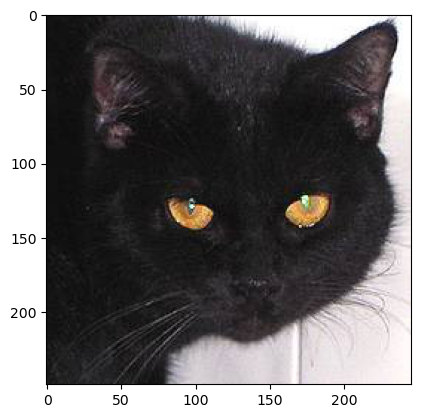

In [59]:
%matplotlib inline

from skimage import data, io
from matplotlib.pyplot import imshow
from keras.preprocessing import image
import numpy as np
import cv2 as cv
import random

num = random.randint(1, 12500)
img_path = f'data/DogCatData/test1/{num}.jpg'

# image loading and transformation to keras
img = cv.imread(img_path)
img_resized = cv.resize(img, (img_width, img_height))
img_test = img_resized / 255.

# TO COMPLETE
prediction = model.predict(img_test.reshape(-1, 150, 150, 3))

# prediction on the image
print(f"Prediction : {prediction}")

image_read = io.imread(img_path)
imshow(image_read)


## Use a pretrained Convnet model

In practice, very few people train an entire Convolutional Network from scratch (with random initialization), because it is relatively rare to have a dataset of sufficient size. Instead, in image classification, it is common to use networks pre-trained on a large dataset (such as ImageNet)  and to use it either as an initialization of as a fixed feature extractor for the task of interest (**transfer learning**). Indeed, these networks have already learned features that are useful for most computer vision problems, and leveraging such features would allow us to reach a better accuracy than any method that would only rely on the available data.

Different strategies can be used in transfer learning scenarios :

1. The ConvNet, trained on a large image dataset such as Imagenet, is used as a fixed feature extractor. In this case, the pipeline consists in taking the pre-trained ConvNet, removing the last fully connected layer and that by treating the rest of the ConvNet architecture as a fixed feature extractor for the new dataset
2. Fine Tuning of the ConvNet. In this case,  the weights of a part of the pretrained network are fine-tuned by continuing the backpropagation. As it as been observed that the first features of a ConvNet contain more generic features (e.g. edge detectors or color blob detectors) that should be useful to many tasks and that later layers become progressively more specific to the details of the classes contained in the original dataset, only a higher portion of the network is fine-tuned.


### ConvNet as a fixed feature extractor   

In our case, the ImageNet dataset contains several "cat" classes (persian cat, siamese cat...) and many "dog" classes among its total of 1000 classes. As a consequence any model pre-trained on ImageNet will already have learned features that are relevant to our classification problem. 

In particular, we will use the VGG16 architecture which won the 2014 Imagenet competition, and is a very simple model to create and understand. The VGG Imagenet team created both a larger, slower, slightly more accurate model (VGG 19) and a smaller, faster model (VGG 16). We will be using VGG 16 since the much slower performance of VGG19 is generally not worth the very minor improvement in accuracy.

![VGG16](images/vgg16.png)

Source : [https://blog.heuritech.com/2016/02/29/a-brief-report-of-the-heuritech-deep-learning-meetup-5/](https://blog.heuritech.com/2016/02/29/a-brief-report-of-the-heuritech-deep-learning-meetup-5/)

In the code below, the strategy will consist in instantiating only the convolutional part of the model (using the *include_top* argument) (see the [Keras documentation on VGG16](https://keras.io/applications/#vgg16)) and in running this model on our own training and validation data once by recording the output in two numpy arrays. Then, you will train a small fully-connected model on top of the stored features.

Some references :
 + VGG models : [http://www.robots.ox.ac.uk/~vgg/research/very_deep/](http://www.robots.ox.ac.uk/~vgg/research/very_deep/)
 



In [27]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras import applications


# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
test_data_dir = 'data/DogCatChallenge/sampleDeep/test'
nb_train_samples = 2000
nb_test_samples = 800
epochs = 50
batch_size = 16


# Function that instanciates the convolutional part of the VGG16 pre-trained model on Imagenet and that runs it on our training and validation data

def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build and load the VGG16 network without the fully connected layers
    # TO COMPLETE
    vgg16_bottleneck = applications.VGG16(weights='imagenet', include_top=False, input_shape = (img_width, img_height, 3))

    # preparation of the training data
    train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    # Generation of the predictions for the input samples from the training data generator and return them as a numpy array that we can save
    bottleneck_features_train = vgg16_bottleneck.predict(train_generator)
    np.save(open('bottleneck_features_train.npy', 'wb'),
            bottleneck_features_train)

    # preparation of the test data
    # TO COMPLETE
    test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    
    # Generation of the predictions for the input samples from the test data generator and return them as a numpy array that we can save
    bottleneck_features_test = vgg16_bottleneck.predict(test_generator)
    np.save(open('bottleneck_features_test.npy', 'wb'),
            bottleneck_features_test)

    
# Function that trains a small fully-connected model on top of the stored previous features
    
    
def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy','rb'))
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    test_data = np.load(open('bottleneck_features_test.npy','rb'))
    test_labels = np.array(
        [0] * (nb_test_samples // 2) + [1] * (nb_test_samples // 2))

    # Building of the small fully-connected model
    # TO COMPLETE
    fully_connected = Sequential()
    fully_connected.add(Flatten())
    fully_connected.add(Dense(100,activation = "relu"))
    fully_connected.add(Dense(50, activation = "relu"))
    fully_connected.add(Dense(1))
    fully_connected.add(Activation("sigmoid"))

    # fully_connected.summary()
    
    # Configuration of the learning process
    fully_connected.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    # Training of the model
    # TO COMPLETE
    fully_connected.fit(
        train_data,
        train_labels,
        validation_data=(test_data, test_labels),
        epochs=10,
        callbacks=[tensorboard_callback])

    # saving the learned model
    fully_connected.save_weights('bottleneck-vgg16.h5')
    print(fully_connected.evaluate(test_data, test_labels))

In [4]:
save_bottlebeck_features()

Found 2000 images belonging to 2 classes.
125/125 [==============================] - 159s 1s/step
Found 800 images belonging to 2 classes.
50/50 [==============================] - 64s 1s/step


In [28]:
train_top_model()

Epoch 1/10
63/63 [==============================] - 2s 23ms/step - loss: 0.5880 - accuracy: 0.7315 - val_loss: 0.3042 - val_accuracy: 0.8550
Epoch 2/10
63/63 [==============================] - 1s 20ms/step - loss: 0.3171 - accuracy: 0.8695 - val_loss: 0.4771 - val_accuracy: 0.7925
Epoch 3/10
63/63 [==============================] - 1s 17ms/step - loss: 0.2513 - accuracy: 0.8965 - val_loss: 0.4563 - val_accuracy: 0.8025
Epoch 4/10
63/63 [==============================] - 1s 17ms/step - loss: 0.1936 - accuracy: 0.9190 - val_loss: 0.3274 - val_accuracy: 0.8562
Epoch 5/10
63/63 [==============================] - 1s 17ms/step - loss: 0.1736 - accuracy: 0.9290 - val_loss: 0.2423 - val_accuracy: 0.9013
Epoch 6/10
63/63 [==============================] - 1s 18ms/step - loss: 0.1342 - accuracy: 0.9460 - val_loss: 0.3362 - val_accuracy: 0.8675
Epoch 7/10
63/63 [==============================] - 1s 18ms/step - loss: 0.1235 - accuracy: 0.9510 - val_loss: 0.2715 - val_accuracy: 0.8938
Epoch 8/10
63

#### Carefully have a look on the results and on the diffferent metrics and their obtained values. What is your interpretation of the results ?
Try to apply this model of some unknown images, even images without dogs ar cats.

## Fine-tuning the top layers of a pre-trained network

We will now try to "fine-tune" the last convolutional block of the VGG16 model. It consist in starting from a trained network (the VGG16 network), then re-training it on a new dataset using very small weight updates. In our case, this can be done in 3 steps:
+ Instantiate the convolutional base of VGG16 and load its weights.
+ Add our previously defined fully-connected model on top, and load its weights.
+ Freeze the layers of the VGG16 model up to the last convolutional block


In [17]:
from keras import applications
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
import keras

# path to the model weights files.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = 'bottleneck-vgg16.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/DogCatChallenge/sampleDeep/train'
test_data_dir = 'data/DogCatChallenge/sampleDeep/test'
nb_train_samples = 2000
nb_test_samples = 800
epochs = 50
batch_size = 16

# creation of the base VGG pre-trained model
model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape = (4, 4, 512)))
top_model.add(Dense(100,activation = "relu"))
top_model.add(Dense(50, activation = "relu"))
top_model.add(Dense(1))
top_model.add(Activation("sigmoid"))

model.build(input_shape = (img_width, img_height, 3))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# creation of a real model from vgg
# TO COMPLETE
new_model = Sequential()
for i, l in enumerate(model.layers):
    new_model.add(l)

# concatenation of the base model with the top model
# TO COMPLETE
for l in top_model.layers:
    new_model.add(l)

# set the first 15 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in new_model.layers[:14]:
    layer.trainable = False

for i, layer in enumerate(new_model.layers):
    print(i, layer.name, layer.trainable)


Model loaded.
0 block1_conv1 False
1 block1_conv2 False
2 block1_pool False
3 block2_conv1 False
4 block2_conv2 False
5 block2_pool False
6 block3_conv1 False
7 block3_conv2 False
8 block3_conv3 False
9 block3_pool False
10 block4_conv1 False
11 block4_conv2 False
12 block4_conv3 False
13 block4_pool False
14 block5_conv1 True
15 block5_conv2 True
16 block5_conv3 True
17 block5_pool True
18 flatten_14 True
19 dense_42 True
20 dense_43 True
21 dense_44 True
22 activation_13 True


In [13]:
new_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)     

In [19]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('vgg16_finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

In [29]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
new_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model
# TO COMPLETE
new_model.fit(train_generator, validation_data=test_generator, epochs=10, callbacks=lr_reduce)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/10
125/125 [==============================] - 264s 2s/step - loss: 0.1813 - accuracy: 0.9385 - val_loss: 0.3032 - val_accuracy: 0.8800 - lr: 1.0000e-04
Epoch 2/10
125/125 [==============================] - 269s 2s/step - loss: 0.1247 - accuracy: 0.9515 - val_loss: 0.2712 - val_accuracy: 0.8975 - lr: 1.0000e-04
Epoch 3/10
125/125 [==============================] - 280s 2s/step - loss: 0.1098 - accuracy: 0.9620 - val_loss: 0.2723 - val_accuracy: 0.8850 - lr: 1.0000e-04
Epoch 4/10
125/125 [==============================] - 279s 2s/step - loss: 0.0740 - accuracy: 0.9725 - val_loss: 0.2963 - val_accuracy: 0.8913 - lr: 1.0000e-04
Epoch 5/10
125/125 [==============================] - 282s 2s/step - loss: 0.0483 - accuracy: 0.9865 - val_loss: 0.3530 - val_accuracy: 0.8950 - lr: 1.0000e-04
Epoch 6/10
125/125 [==============================] - 272s 2s/step - loss: 0.0571 - accuracy: 0.9790 - val_loss: 0.29

In [41]:
new_model.save('./fine-tuned-vgg16/')

INFO:tensorflow:Assets written to: ./fine-tuned-vgg16/assets


INFO:tensorflow:Assets written to: ./fine-tuned-vgg16/assets


#### Carefully have a look on the results and on the diffferent metrics and their obtained values. What is your interpretation of the results ?
Try to apply this model of some unknown images, even images without dogs ar cats.

1/1 [==============================] - 0s 116ms/step
Prediction : [[0.9999785]]


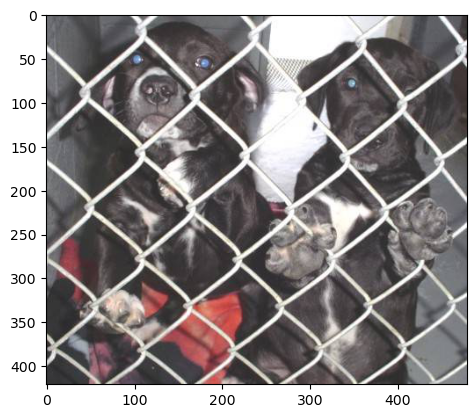

In [52]:
%matplotlib inline

from skimage import data, io
from matplotlib.pyplot import imshow
from keras.preprocessing import image
import numpy as np
import cv2 as cv
import random

num = random.randint(1, 12500)
img_path = f'data/DogCatData/test1/{num}.jpg'

# image loading and transformation to keras
img = cv.imread(img_path)
img_resized = cv.resize(img, (img_width, img_height))
img_test = img_resized / 255.

# TO COMPLETE
prediction = new_model.predict(img_test.reshape(-1, 150, 150, 3))

# prediction on the image
print(f"Prediction : {prediction}")

image_read = io.imread(img_path)
imshow(image_read)


#### Summary of Part 3

    
+ <span style="background-color:lightgreen">Introduction to representation learning </span>.
+ <span style="background-color:lightgreen"> Introduction to deep learning and CNN.</span> 
+ <span style="background-color:lightgreen"> Practice on Keras </span>
+ <span style="background-color:lightgreen"> Introduction to transfer learning and fine tuning </span>

<span style="background-color:lightblue"> You have finished the part 2 ! Complete the dashboard on the global MsTeams team.</span>

# Sources and references

+ This study case is inpired from the Lesson 1 of the fast.ai's online course, Practical Deep Learning For Coders : [http://course.fast.ai/](http://course.fast.ai/)
+ Others sources :
    + Stanford CS231n course on Convolutional Neural Networks for Visual Recognition : [http://cs231n.stanford.edu/](http://cs231n.stanford.edu/)
    + Keras blog post on building image classification models [here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)